<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Customers_Churn_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d barun2104/telecom-churn

  0% 0.00/45.5k [00:00<?, ?B/s]
100% 45.5k/45.5k [00:00<00:00, 13.3MB/s]


In [17]:
from zipfile import ZipFile
file_name='/content/telecom-churn.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [18]:
import pandas as pd

In [19]:
data=pd.read_csv('/content/telecom_churn.csv')

In [45]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [47]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [48]:
X=data.drop(['Churn'],axis=1)
Y=data['Churn']

from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=12)

In [66]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=1000)
model=RF.fit(X_train,Y_train)
Y_pred=model.predict(X_test)


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve
print("Akurasi Model yaitu :", accuracy_score(Y_pred,Y_test)*100,"%")

Akurasi Model yaitu : 95.35232383808095 %


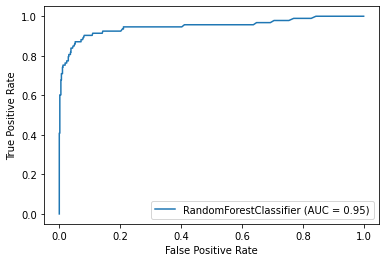

In [71]:
rfc_disp = plot_roc_curve(model, X_test, Y_test)

In [72]:
import seaborn as sns
cm=confusion_matrix(Y_pred,Y_test)
print(cm)

[[566  23]
 [  8  70]]


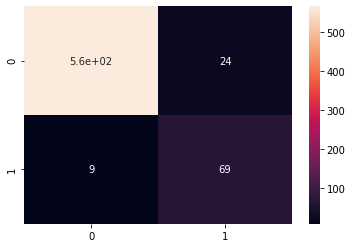

In [65]:
_=sns.heatmap(cm,annot=True)